# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others.csv")
DPP_DTT_df

solution_concentration  polymer_mw  polymer_mn  polymer_dispersity  \
0                      4.00      299.00      90.000                3.32   
1                      4.00      299.00      90.000                3.32   
2                      4.00      299.00      90.000                3.32   
3                      4.00      299.00      90.000                3.32   
4                      4.00      299.00      90.000                3.32   
5                      4.00      299.00      90.000                3.32   
6                      4.00      299.00      90.000                3.32   
7                      4.00      299.00      90.000                3.32   
8                      4.00      299.00      90.000                3.32   
9                      4.00      299.00      90.000                3.32   
10                     4.00      299.00      90.000                3.32   
11                     5.00      292.20      74.900                3.90   
12                     5.00      292.20      74.900                3.90   
13                     5.00      292.20      74.900                3.90   
14                     5.00      292.20      74.900                3.90   
15                     5.00      292.20      74.900                3.90   
16                     5.00      292.20      74.900                3.90   
17                     5.00      292.20      74.900                3.90   
18                     5.00      292.20      74.900                3.90   
19                     5.00      292.20      74.900                3.90   
20                     5.00      501.00     110.000                4.55   
21                     5.00      501.00     110.000                4.55   
22                     5.00      501.00     110.000                4.55   
23                     5.00      501.00     110.000                4.55   
24                     5.00      501.00     110.000                4.55   
25                     5.00      501.00     110.000                4.55   
26                     5.00      501.00     110.000                4.55   
27                     5.00      501.00     110.000                4.55   
28                     5.00      501.00     110.000                4.55   
29                     5.00      501.00     110.000                4.55   
30                     5.00      501.00     110.000                4.55   
31                     4.00      199.00      55.000                3.62   
32                     4.00      199.00      55.000                3.62   
33                     4.00      199.00      55.000                3.62   
34                     4.00      199.00      55.000                3.62   
35                     4.00      199.00      55.000                3.62   
36                     4.00      199.00      55.000                3.62   
37                     4.00      199.00      55.000                3.62   
38                     4.00      199.00      55.000                3.62   
39                     3.00      290.00     143.000                2.03   
40                     3.00      290.00     143.000                2.03   
41                     7.00      290.00     143.000                2.03   
42                     7.00      290.00     143.000                2.03   
43                     6.50      100.00      67.000                3.00   
44                     1.60      279.00      77.000                3.65   
45                     1.60      279.00      77.000                3.65   
46                     0.50      102.00      43.000                2.00   
47                     0.75      102.00      43.000                2.00   
48                     1.00      102.00      43.000                2.00   
49                     2.00      102.00      43.000                2.00   
50                     5.00      102.00      43.000                2.00   
51                     0.50      102.00      43.000                2.00   
52                     0.75   

In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'channel_width',
 'channel_length',
 'film_deposition_type_spin',
 'film_deposition_type_MGC',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent',
 'post_process_annealing']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPPPDTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.615
R² score for test set: 0.285


## Polynomial regression

Degree 1: R² train = 0.615, R² test = 0.285
Degree 2: R² train = 0.845, R² test = -24894722003.734
Degree 3: R² train = 0.846, R² test = -5381.049
Degree 4: R² train = 0.846, R² test = -4002460.043
Degree 5: R² train = 0.846, R² test = -4037860.864
Degree 6: R² train = 0.846, R² test = -15898695.802


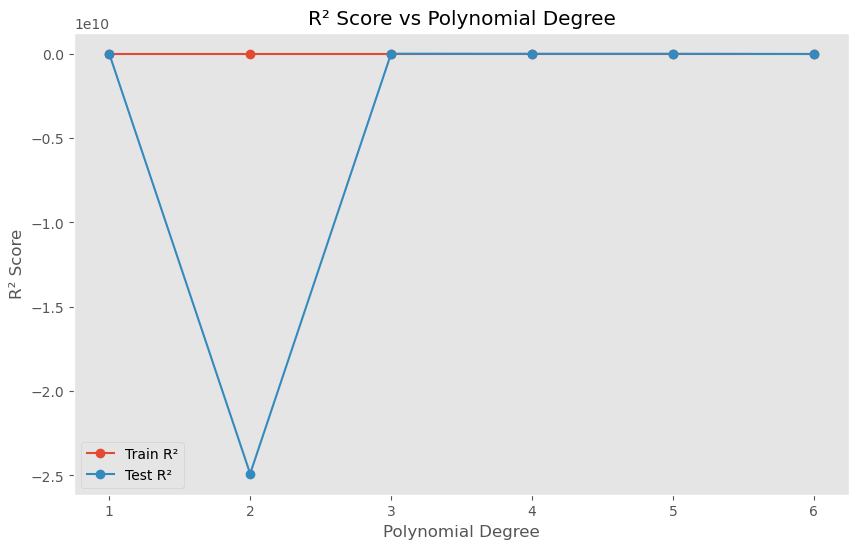

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.615, R² test = 0.287
Alpha 0.2: R² train = 0.614, R² test = 0.288
Alpha 0.3: R² train = 0.614, R² test = 0.289
Alpha 0.4: R² train = 0.614, R² test = 0.290
Alpha 0.5: R² train = 0.614, R² test = 0.290
Alpha 0.6: R² train = 0.614, R² test = 0.291
Alpha 0.7: R² train = 0.613, R² test = 0.292
Alpha 0.8: R² train = 0.613, R² test = 0.292
Alpha 0.9: R² train = 0.613, R² test = 0.292
Alpha 1.0: R² train = 0.613, R² test = 0.293


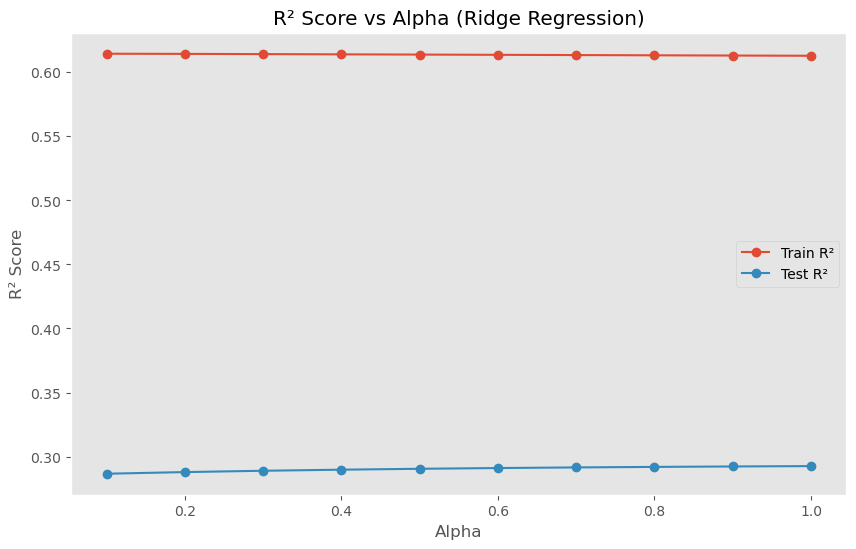

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.559, R² test = 0.195
Alpha 0.2: R² train = 0.554, R² test = 0.186
Alpha 0.3: R² train = 0.554, R² test = 0.186
Alpha 0.4: R² train = 0.554, R² test = 0.187
Alpha 0.5: R² train = 0.553, R² test = 0.188
Alpha 0.6: R² train = 0.553, R² test = 0.188
Alpha 0.7: R² train = 0.553, R² test = 0.189
Alpha 0.8: R² train = 0.553, R² test = 0.189
Alpha 0.9: R² train = 0.552, R² test = 0.189
Alpha 1.0: R² train = 0.552, R² test = 0.190


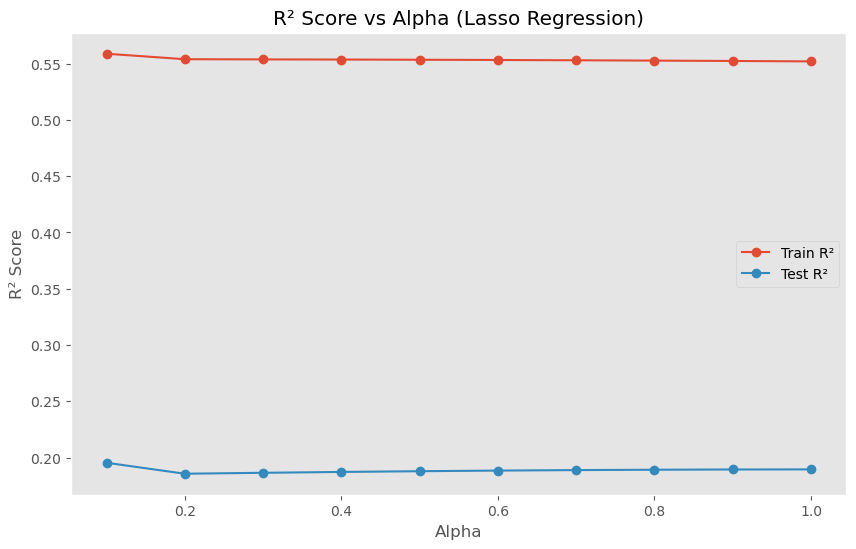

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.597771  0.277325
1     0.1       0.2  0.594324  0.276637
2     0.1       0.3  0.590017  0.274358
3     0.1       0.4  0.585340  0.268914
4     0.1       0.5  0.580445  0.260824
5     0.1       0.6  0.576900  0.250213
6     0.1       0.7  0.572909  0.237224
7     0.1       0.8  0.567956  0.221397
8     0.1       0.9  0.561729  0.201846
9     0.1       1.0  0.558786  0.195406
10    0.2       0.1  0.585014  0.253189
11    0.2       0.2  0.576495  0.243869
12    0.2       0.3  0.569711  0.228363
13    0.2       0.4  0.563113  0.208077
14    0.2       0.5  0.557164  0.191746
15    0.2       0.6  0.554335  0.185302
16    0.2       0.7  0.554249  0.185418
17    0.2       0.8  0.554150  0.185524
18    0.2       0.9  0.554038  0.185604
19    0.2       1.0  0.553912  0.185676
20    0.3       0.1  0.575547  0.235341
21    0.3       0.2  0.566004  0.217563
22    0.3       0.3  0.557973  0.193586
23    0.3       0.4  0.554333  0.185405


## Support Vector Regression (SVR)

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

# Visualize R² scores as heatmaps
# Pivot data for heatmaps
train_heatmap = results_df.pivot("C", "epsilon", "r2_train")
test_heatmap = results_df.pivot("C", "epsilon", "r2_test")

# Plot train heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Train R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()

# Plot test heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Test R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1 -0.098520 -0.075645
1   1      0.2 -0.075922 -0.044329
2   1      0.3 -0.047241 -0.013179
3   1      0.4 -0.029124  0.000855
4   1      0.5 -0.009613  0.016666
5   1      0.6  0.005831  0.018162
6   1      0.7  0.017642  0.008532
7   1      0.8  0.024505 -0.008490
8   1      0.9  0.025499 -0.038723
9   1      1.0  0.019151 -0.084838
10  1      1.1  0.009133 -0.141921
11  2      0.1 -0.076132 -0.059715
12  2      0.2 -0.053882 -0.027219
13  2      0.3 -0.026625 -0.004383
14  2      0.4 -0.001147  0.018383
15  2      0.5  0.015552  0.029410
16  2      0.6  0.027148  0.026247
17  2      0.7  0.038006  0.013663
18  2      0.8  0.043927 -0.005960
19  2      0.9  0.041165 -0.040037
20  2      1.0  0.032752 -0.084338
21  2      1.1  0.022565 -0.141794
22  3      0.1 -0.065612 -0.062771
23  3      0.2 -0.038962 -0.022137
24  3      0.3 -0.008158  0.007800
25  3      0.4  0.011615  0.025945
26  3      0.5  0.031392  0.038487
27  3      0.6  0.04

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## Decision tree regression

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.846
R² score for test set: 0.555


## Random forest regression

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.839931  0.431926
26           360  0.839853  0.429398
21           310  0.839728  0.428765
28           380  0.839734  0.427057
27           370  0.839885  0.426963
24           340  0.839869  0.426518
20           300  0.839909  0.425170
30           400  0.839786  0.422969
22           320  0.839765  0.422838
18           280  0.839929  0.422439


## Gradient bossting regression

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_neighbors  r2_train   r2_test
0             1  0.598713  0.320933
12           13  0.492006  0.309425
13           14  0.448347  0.302930
11           12  0.530022  0.299208
14           15  0.410955  0.293494
10           11  0.573035  0.289998
9            10  0.598190  0.278701
15           16  0.368389  0.270767
1             2  0.780936  0.266259
8             9  0.634523  0.236272


## K-nearest Neighbors Regression

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
0             1  0.598713  0.320933
12           13  0.492006  0.309425
13           14  0.448347  0.302930
11           12  0.530022  0.299208
14           15  0.410955  0.293494
10           11  0.573035  0.289998
9            10  0.598190  0.278701
15           16  0.368389  0.270767
1             2  0.780936  0.266259
8             9  0.634523  0.236272


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, Y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(Y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, Y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
402            120            0.6          3  0.846114  0.424545
562            130            0.6          3  0.846114  0.424545
722            140            0.6          3  0.846114  0.424545
882            150            0.6          3  0.846114  0.424545
1042           160            0.6          3  0.846114  0.424545
1202           170            0.6          3  0.846114  0.424545
1362           180            0.6          3  0.846114  0.424545
1522           190            0.6          3  0.846114  0.424545
1682           200            0.6          3  0.846114  0.424545
1842           210            0.6          3  0.846114  0.424545


In [ ]:
!pip install catboost

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      iterations  learning_rate  depth  r2_train   r2_test
3505         310            1.0      2  0.846095  0.503392
3185         290            1.0      2  0.846093  0.503323
3345         300            1.0      2  0.846094  0.503242
2865         270            1.0      2  0.846089  0.502964
2545         250            1.0      2  0.846087  0.502880
3025         280            1.0      2  0.846090  0.502807
2705         260            1.0      2  0.846088  0.502648
2225         230            1.0      2  0.846081  0.502629
2385         240            1.0      2  0.846085  0.502483
2065         220            1.0      2  0.846078  0.502373


## Adaboost regression

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

y_train = y_train.values  # Convert to NumPy array
y_test = y_test.values  # Convert to NumPy array

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
831            150            0.2         16    0.8207  0.662476
2271           240            0.2         16    0.8207  0.662476
2750           270            0.2         15    0.8207  0.662476
2749           270            0.2         14    0.8207  0.662476
2748           270            0.2         13    0.8207  0.662476
2747           270            0.2         12    0.8207  0.662476
2746           270            0.2         11    0.8207  0.662476
3057           290            0.2          2    0.8207  0.662476
3058           290            0.2          3    0.8207  0.662476
3059           290            0.2          4    0.8207  0.662476


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=150,
    learning_rate=0.2,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature rankings
feature_names = [f"Feature {i+1}" for i in range(DPP_DTT_X.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Print the features sorted by importance
print("Feature Importance (Ascending Order):")
print(importance_df)


Feature Importance (Ascending Order):
       Feature  Importance
4    Feature 5    0.000000
10  Feature 11    0.000000
14  Feature 15    0.000000
13  Feature 14    0.000001
0    Feature 1    0.009099
12  Feature 13    0.010163
2    Feature 3    0.018434
5    Feature 6    0.043502
8    Feature 9    0.044019
7    Feature 8    0.044249
11  Feature 12    0.047043
3    Feature 4    0.057926
9   Feature 10    0.098842
6    Feature 7    0.107489
1    Feature 2    0.519233


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
DPP_DTT_X

solution_concentration  polymer_mw  polymer_mn  polymer_dispersity  \
0                      4.00      299.00      90.000                3.32   
1                      4.00      299.00      90.000                3.32   
2                      4.00      299.00      90.000                3.32   
3                      4.00      299.00      90.000                3.32   
4                      4.00      299.00      90.000                3.32   
5                      4.00      299.00      90.000                3.32   
6                      4.00      299.00      90.000                3.32   
7                      4.00      299.00      90.000                3.32   
8                      4.00      299.00      90.000                3.32   
9                      4.00      299.00      90.000                3.32   
10                     4.00      299.00      90.000                3.32   
11                     5.00      292.20      74.900                3.90   
12                     5.00      292.20      74.900                3.90   
13                     5.00      292.20      74.900                3.90   
14                     5.00      292.20      74.900                3.90   
15                     5.00      292.20      74.900                3.90   
16                     5.00      292.20      74.900                3.90   
17                     5.00      292.20      74.900                3.90   
18                     5.00      292.20      74.900                3.90   
19                     5.00      292.20      74.900                3.90   
20                     5.00      501.00     110.000                4.55   
21                     5.00      501.00     110.000                4.55   
22                     5.00      501.00     110.000                4.55   
23                     5.00      501.00     110.000                4.55   
24                     5.00      501.00     110.000                4.55   
25                     5.00      501.00     110.000                4.55   
26                     5.00      501.00     110.000                4.55   
27                     5.00      501.00     110.000                4.55   
28                     5.00      501.00     110.000                4.55   
29                     5.00      501.00     110.000                4.55   
30                     5.00      501.00     110.000                4.55   
31                     4.00      199.00      55.000                3.62   
32                     4.00      199.00      55.000                3.62   
33                     4.00      199.00      55.000                3.62   
34                     4.00      199.00      55.000                3.62   
35                     4.00      199.00      55.000                3.62   
36                     4.00      199.00      55.000                3.62   
37                     4.00      199.00      55.000                3.62   
38                     4.00      199.00      55.000                3.62   
39                     3.00      290.00     143.000                2.03   
40                     3.00      290.00     143.000                2.03   
41                     7.00      290.00     143.000                2.03   
42                     7.00      290.00     143.000                2.03   
43                     6.50      100.00      67.000                3.00   
44                     1.60      279.00      77.000                3.65   
45                     1.60      279.00      77.000                3.65   
46                     0.50      102.00      43.000                2.00   
47                     0.75      102.00      43.000                2.00   
48                     1.00      102.00      43.000                2.00   
49                     2.00      102.00      43.000                2.00   
50                     5.00      102.00      43.000                2.00   
51                     0.50      102.00      43.000                2.00   
52                     0.75   